In [26]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [27]:
data = pd.read_csv('../data/data.csv').drop(columns=['state_fips_code', 'county_fips_code', 'case_month', 'Unnamed: 0'])
data.pop_estimate_2019 = data.pop_estimate_2019.str.replace(',', '')
data

,hosp_yn,death_yn,sex_female,age_0,age_18,age_50,age_65,race_native,race_asian,race_black,...,economic_typology_2015,pop_estimate_2019,less_hs_pct,hs_only_pct,some_college_pct,bachelor_higher_pct,unempl_rate,med_hh_income_19,med_hh_income_pct_state_total_19,poverty_pct_19
0,False,False,True,False,True,False,False,False,False,False,...,0.0,55869,11.5,33.6,28.4,26.6,4.9,58233.0,112.481888,12.1
1,False,False,True,False,True,False,False,False,False,False,...,0.0,55869,11.5,33.6,28.4,26.6,4.9,58233.0,112.481888,12.1
2,False,False,True,False,False,True,False,False,False,False,...,0.0,55869,11.5,33.6,28.4,26.6,4.9,58233.0,112.481888,12.1
3,False,False,True,False,False,True,False,False,False,False,...,0.0,55869,11.5,33.6,28.4,26.6,4.9,58233.0,112.481888,12.1
4,False,False,True,False,True,False,False,False,False,False,...,0.0,55869,11.5,33.6,28.4,26.6,4.9,58233.0,112.481888,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240793,False,False,False,False,False,True,False,False,False,False,...,0.0,72999,7.3,38.0,33.0,21.6,6.7,57325.0,89.323280,10.7
240794,False,False,False,False,True,False,False,False,False,False,...,0.0,72999,7.3,38.0,33.0,21.6,6.7,57325.0,89.323280,10.7
240795,False,False,False,False,True,False,False,False,False,False,...,0.0,72999,7.3,38.0,33.0,21.6,6.7,57325.0,89.323280,10.7
240796,False,False,True,False,False,False,True,False,False,False,...,0.0,72999,7.3,38.0,33.0,21.6,6.7,57325.0,89.323280,10.7


In [28]:
Z = data.iloc[:, :].values.astype(float)
X = Z[:, 2:]

In [29]:
pca_score = {'n_components': [], 'score': [], 'explained_variance_ratio_': []}

for n_components in tqdm(range(X.shape[1])):
    pca_score['n_components'].append(n_components)
    pca = PCA(n_components=n_components).fit(X)
    pca_score['score'].append(pca.score(X))
    pca_score['explained_variance_ratio_'].append(pca.explained_variance_ratio_)

100%|██████████| 28/28 [00:27<00:00,  1.02it/s]


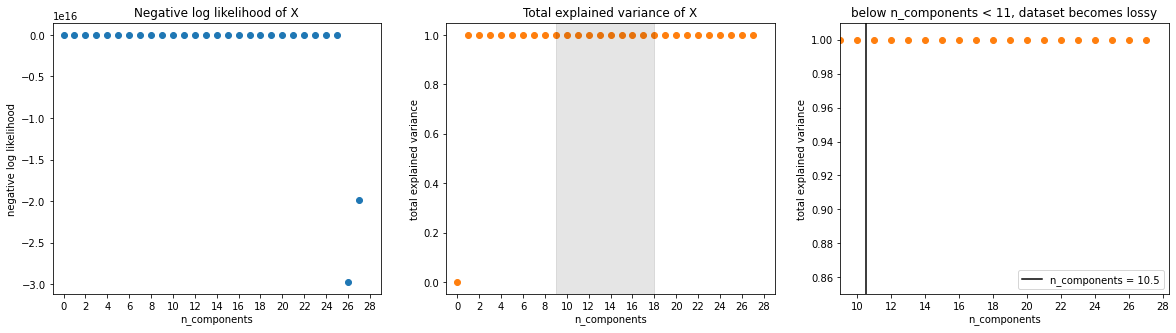

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
ax1.scatter(pca_score['n_components'], pca_score['score'])
ax1.set_xlabel('n_components'); ax1.set_ylabel('negative log likelihood')
ax1.set_title('Negative log likelihood of X'); ax1.set_xticks(range(0, 29, 2)); ax1.set_xlim(-1, 29);

ax2.scatter(pca_score['n_components'], [sum(ratios) for ratios in pca_score['explained_variance_ratio_']], color='tab:orange')
ax2.set_xlabel('n_components'); ax2.set_ylabel('total explained variance'); ax2.axvspan(9, 18, color='black', alpha=0.1)
ax2.set_title('Total explained variance of X'); ax2.set_xticks(range(0, 29, 2)); ax2.set_xlim(-1, 29);

ax3.scatter(pca_score['n_components'], [sum(ratios) for ratios in pca_score['explained_variance_ratio_']], color='tab:orange')
ax3.set_xlabel('n_components'); ax3.set_ylabel('total explained variance'); ax3.set_xticks(range(0, 29, 2)); ax3.set_xlim(9, None); ax3.set_ylim(0.85, 1.01)
ax3.axvline(10.5, color='black', label='n_components = 10.5'); ax3.set_title('below n_components < 11, dataset becomes lossy'); ax3.legend();